# Analysis of the Correctness

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

df_to_create = pd.read_csv("../results/correctness.csv")
df_to_create.head()

ID           PART  PART_ID  ENV1_ID  ENV2_ID  PRJ1_ID  PRJ2_ID  P1T1  P1T2  \
0   1  1st VR Chaoss        3        2        1        1        2   1.0   1.0   
1   7  1st VR Chaoss        3        2        1        1        2   1.0   1.0   
2  14  1st VR Chaoss        3        2        1        1        2   1.0   1.0   
3  18  1st VR Chaoss        3        2        1        1        2   1.0   1.0   
4  33  1st VR Chaoss        3        2        1        1        2   1.0   0.5   

   P1T3  ...  P1T5  P2T1  P2T2  P2T3  P2T4  P2T5  TOTAL  P1_AVG  P2_AVG  \
0   1.0  ...   1.0  1.00   1.0   1.0   1.0   1.0  10.00    1.00    1.00   
1   1.0  ...   1.0  1.00   1.0   1.0   1.0   1.0  10.00    1.00    1.00   
2   1.0  ...   1.0  1.00   1.0   1.0   1.0   1.0  10.00    1.00    1.00   
3   0.5  ...   0.5  0.33   1.0   1.0   1.0   1.0   7.83    0.70    0.87   
4   0.5  ...   1.0  1.00   0.5   1.0   1.0   1.0   8.33    0.77    0.90   

   TOTAL_AVG  
0       1.00  
1       1.00  
2       1.00  
3       0.78  
4       0.83  

[5 rows x 21 columns]

In [108]:
# Get columns by groups
is_firstvrchaoss =  df_to_create['PART']=="1st VR Chaoss"
first_vr_chaoss = df_to_create[is_firstvrchaoss]

is_firstvrop =  df_to_create['PART']=="1st VR Openshift"
first_vr_openshift = df_to_create[is_firstvrop]

is_firstscchaoss =  df_to_create['PART']=="1st SC Chaoss"
first_sc_chaoss = df_to_create[is_firstscchaoss]

is_firstscopenshift =  df_to_create['PART']=="1st SC Openshift"
first_sc_openshift = df_to_create[is_firstscopenshift]


<ipython-input-109-89547be8bf99>:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c1, c2, c3, c4],     # The line objects


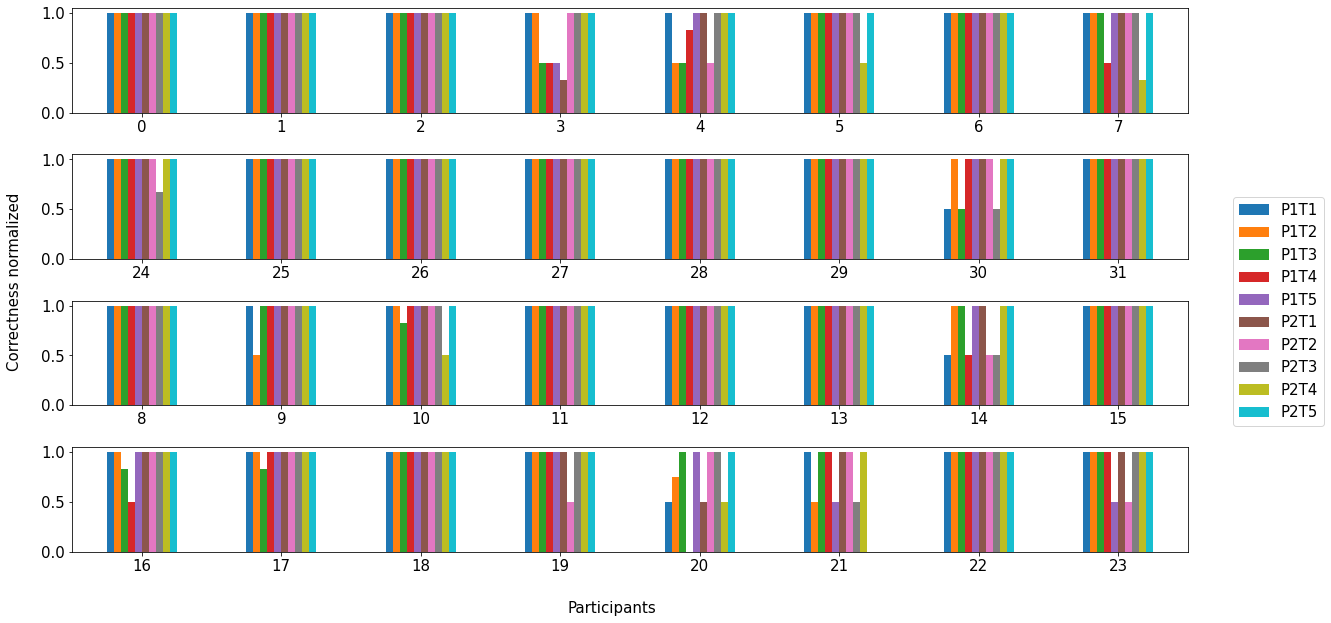

In [109]:
# Correctness by participant
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

c1 = first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[0], kind="bar", rot=0)
axes[0].get_legend().remove()

c2 = first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[1], kind="bar", rot=0)
axes[1].get_legend().remove()

c3 = first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[2], kind="bar", rot=0)
axes[2].get_legend().remove()

c4 = first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[3], kind="bar", rot=0)
axes[3].get_legend().remove()

fig.legend([c1, c2, c3, c4],     # The line objects
           labels=['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5'],   # The labels for each line
           loc="right",   # Position of legend
           )

fig.text(0.5, 0.04, 'Participants', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_participants.png', bbox_inches='tight')

<ipython-input-110-8c8603e9b23e>:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


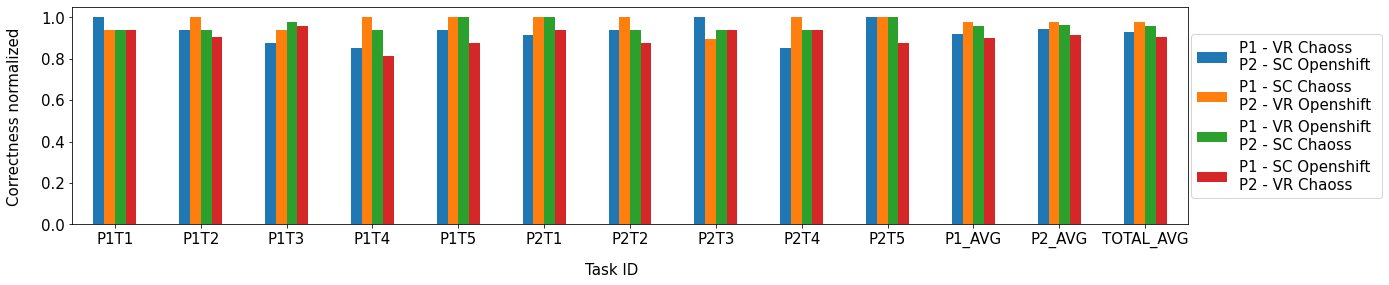

In [110]:
# Means by group

data = {'1st VR Chaoss': first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5', 'P1_AVG', 'P2_AVG', 'TOTAL_AVG']].mean(),
        '1st SC Chaoss': first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5', 'P1_AVG', 'P2_AVG', 'TOTAL_AVG']].mean(),
        '1st VR Openshift': first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5', 'P1_AVG', 'P2_AVG', 'TOTAL_AVG']].mean(),
        '1st SC Openshift': first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5', 'P1_AVG', 'P2_AVG', 'TOTAL_AVG']].mean()
       }

corr_means = pd.DataFrame(data)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = corr_means.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["P1 - VR Chaoss \nP2 - SC Openshift", "P1 - SC Chaoss \nP2 - VR Openshift", "P1 - VR Openshift \nP2 - SC Chaoss", "P1 - SC Openshift \nP2 - VR Chaoss"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1.04, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_avg_environment.png', bbox_inches='tight')

In [111]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataframe from the CSV file
df = df_to_create

# Fit the mixed linear model
model = mixedlm("P1_AVG ~ PART", df, groups=df["ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

##########EFFECT SIZE
# Get the estimated coefficients
coef = result.params

# Get the standard errors of the coefficients
std_err = result.bse

# Compute Cohen's d for each group compared to the reference group
reference_group = '1st SC Chaoss'
groups = ['1st SC Openshift', '1st VR Chaoss', '1st VR Openshift']

for group in groups:
    if group != reference_group:
        diff = coef[f'PART[T.{group}]']
        se_diff = std_err[f'PART[T.{group}]']
        n_ref = 1  # Assuming the reference group has a single observation
        n_group = 1  # Assuming each group has a single observation
        pooled_sd = np.sqrt((n_ref * se_diff) ** 2 + (n_group * se_diff) ** 2)
        d = diff / pooled_sd
        print(f"Cohen's d for {group} vs {reference_group}: {d}")

############################################################################################

# Fit the mixed linear model
model = mixedlm("P2_AVG ~ PART", df, groups=df["ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

##########EFFECT SIZE
# Get the estimated coefficients
coef = result.params

# Get the standard errors of the coefficients
std_err = result.bse

# Compute Cohen's d for each group compared to the reference group
reference_group = '1st SC Chaoss'
groups = ['1st SC Openshift', '1st VR Chaoss', '1st VR Openshift']

for group in groups:
    if group != reference_group:
        diff = coef[f'PART[T.{group}]']
        se_diff = std_err[f'PART[T.{group}]']
        n_ref = 1  # Assuming the reference group has a single observation
        n_group = 1  # Assuming each group has a single observation
        pooled_sd = np.sqrt((n_ref * se_diff) ** 2 + (n_group * se_diff) ** 2)
        d = diff / pooled_sd
        print(f"Cohen's d for {group} vs {reference_group}: {d}")


############################################################################################
# Fit the mixed linear model
model = mixedlm("TOTAL_AVG ~ PART", df, groups=df["ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())


##########EFFECT SIZE
# Get the estimated coefficients
coef = result.params

# Get the standard errors of the coefficients
std_err = result.bse

# Compute Cohen's d for each group compared to the reference group
reference_group = '1st SC Chaoss'
groups = ['1st SC Openshift', '1st VR Chaoss', '1st VR Openshift']

for group in groups:
    if group != reference_group:
        diff = coef[f'PART[T.{group}]']
        se_diff = std_err[f'PART[T.{group}]']
        n_ref = 1  # Assuming the reference group has a single observation
        n_group = 1  # Assuming each group has a single observation
        pooled_sd = np.sqrt((n_ref * se_diff) ** 2 + (n_group * se_diff) ** 2)
        d = diff / pooled_sd
        print(f"Cohen's d for {group} vs {reference_group}: {d}")

               Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      P1_AVG 
No. Observations:      32           Method:                  REML   
No. Groups:            32           Scale:                   0.0051 
Min. group size:       1            Log-Likelihood:          20.3914
Max. group size:       1            Converged:               Yes    
Mean group size:       1.0                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 0.975    0.010 101.388 0.000  0.956  0.994
PART[T.1st SC Openshift] -0.076    0.034  -2.255 0.024 -0.143 -0.010
PART[T.1st VR Chaoss]    -0.054    0.026  -2.099 0.036 -0.104 -0.004
PART[T.1st VR Openshift] -0.016    0.038  -0.430 0.667 -0.090  0.058
Group Var                 0.005                   

/home/dlumbrer/venvs/icsme/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dlumbrer/venvs/icsme/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/home/dlumbrer/venvs/icsme/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dlumbrer/venvs/icsme/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/home/dlumbrer/venvs/icsme/lib/python3.8/site-packages/statsmode